In [1]:
import torch
import torch.nn.functional as F
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from pathlib import Path
import json

basepath = Path('/Users/aryamangupta/CricML/Match_Prediction/')
data_folder_path = basepath / 'data' / 'ipl_json'

In [7]:
dataset = []


for json_path in sorted(data_folder_path.glob('*.json')):
    with json_path.open() as f:
        json_data = f.read()
        match_data = json.loads(json_data)
        # print (data['info'])
        year = match_data["info"]["dates"][0].split('-')[0]
        # print(year)
        stadium = match_data["info"]["venue"]
        print(stadium)

        for inning in match_data['innings']:
            inning_dataset = []
            for over in inning['overs']:
                for delivery in over['deliveries']:
                    delivery_data = []
                    if 'wickets' in delivery:
                        delivery_data.append('W')
                    else:
                        delivery_data.append(str(delivery['runs']['total']))
                    inning_dataset.append(delivery_data)
            dataset.append((inning_dataset,year,stadium))

Rajiv Gandhi International Stadium, Uppal
Maharashtra Cricket Association Stadium
Saurashtra Cricket Association Stadium
Holkar Cricket Stadium
M.Chinnaswamy Stadium
Rajiv Gandhi International Stadium, Uppal
Wankhede Stadium
Holkar Cricket Stadium
Maharashtra Cricket Association Stadium
Wankhede Stadium
Eden Gardens
M Chinnaswamy Stadium
Saurashtra Cricket Association Stadium
Eden Gardens
Feroz Shah Kotla
Wankhede Stadium
M Chinnaswamy Stadium
Feroz Shah Kotla
Rajiv Gandhi International Stadium, Uppal
Saurashtra Cricket Association Stadium
Rajiv Gandhi International Stadium, Uppal
Holkar Cricket Stadium
Eden Gardens
Wankhede Stadium
Maharashtra Cricket Association Stadium
Saurashtra Cricket Association Stadium
Eden Gardens
Wankhede Stadium
Maharashtra Cricket Association Stadium
M Chinnaswamy Stadium
Eden Gardens
Punjab Cricket Association IS Bindra Stadium, Mohali
Maharashtra Cricket Association Stadium
Saurashtra Cricket Association Stadium
Punjab Cricket Association IS Bindra Stadiu

In [9]:
print(len(dataset))
print((dataset[0][2]))

2217
Rajiv Gandhi International Stadium, Uppal


In [12]:
all_stadia = [stadium for inning,year,stadium in dataset]
stadia = sorted(list(set(all_stadia)))
print(stadia)

['Arun Jaitley Stadium', 'Arun Jaitley Stadium, Delhi', 'Barabati Stadium', 'Barsapara Cricket Stadium, Guwahati', 'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow', 'Brabourne Stadium', 'Brabourne Stadium, Mumbai', 'Buffalo Park', 'De Beers Diamond Oval', 'Dr DY Patil Sports Academy', 'Dr DY Patil Sports Academy, Mumbai', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium', 'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam', 'Dubai International Cricket Stadium', 'Eden Gardens', 'Eden Gardens, Kolkata', 'Feroz Shah Kotla', 'Green Park', 'Himachal Pradesh Cricket Association Stadium', 'Himachal Pradesh Cricket Association Stadium, Dharamsala', 'Holkar Cricket Stadium', 'JSCA International Stadium Complex', 'Kingsmead', 'M Chinnaswamy Stadium', 'M Chinnaswamy Stadium, Bengaluru', 'M.Chinnaswamy Stadium', 'MA Chidambaram Stadium', 'MA Chidambaram Stadium, Chepauk', 'MA Chidambaram Stadium, Chepauk, Chennai', 'Maharaja Yadavindra Singh Internation

In [13]:
stadium_to_city = {
    # Delhi
    'Arun Jaitley Stadium': 'Delhi_A',
    'Arun Jaitley Stadium, Delhi': 'Delhi_A',
    'Feroz Shah Kotla': 'Delhi_A',  # This is the old name of Arun Jaitley Stadium
    
    # Mumbai (3 different stadiums)
    'Brabourne Stadium': 'Mumbai_A',
    'Brabourne Stadium, Mumbai': 'Mumbai_A',
    'Dr DY Patil Sports Academy': 'Mumbai_B',
    'Dr DY Patil Sports Academy, Mumbai': 'Mumbai_B',
    'Wankhede Stadium': 'Mumbai_C',
    'Wankhede Stadium, Mumbai': 'Mumbai_C',
    
    # Pune (2 different stadiums)
    'Maharashtra Cricket Association Stadium': 'Pune_A',
    'Maharashtra Cricket Association Stadium, Pune': 'Pune_A',
    'Subrata Roy Sahara Stadium': 'Pune_A',  # Old name of MCA Stadium
    'Nehru Stadium': 'Pune_B',
    
    # Mohali/Chandigarh area (2 different stadiums)
    'Maharaja Yadavindra Singh International Cricket Stadium, Mullanpur': 'Mohali_B',
    'Punjab Cricket Association IS Bindra Stadium': 'Mohali_A',
    'Punjab Cricket Association IS Bindra Stadium, Mohali': 'Mohali_A',
    'Punjab Cricket Association IS Bindra Stadium, Mohali, Chandigarh': 'Mohali_A',
    'Punjab Cricket Association Stadium, Mohali': 'Mohali_A',
    
    # Abu Dhabi (same stadium, different names)
    'Sheikh Zayed Stadium': 'Abu_Dhabi_A',
    'Zayed Cricket Stadium, Abu Dhabi': 'Abu_Dhabi_A',
    
    # Other Indian Cities (single stadium each)
    'Barabati Stadium': 'Cuttack',
    'Barsapara Cricket Stadium, Guwahati': 'Guwahati',
    'Bharat Ratna Shri Atal Bihari Vajpayee Ekana Cricket Stadium, Lucknow': 'Lucknow',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium': 'Visakhapatnam',
    'Dr. Y.S. Rajasekhara Reddy ACA-VDCA Cricket Stadium, Visakhapatnam': 'Visakhapatnam',
    'Eden Gardens': 'Kolkata',
    'Eden Gardens, Kolkata': 'Kolkata',
    'Green Park': 'Kanpur',
    'Himachal Pradesh Cricket Association Stadium': 'Dharamsala',
    'Himachal Pradesh Cricket Association Stadium, Dharamsala': 'Dharamsala',
    'Holkar Cricket Stadium': 'Indore',
    'JSCA International Stadium Complex': 'Ranchi',
    'M Chinnaswamy Stadium': 'Bengaluru',
    'M Chinnaswamy Stadium, Bengaluru': 'Bengaluru',
    'M.Chinnaswamy Stadium': 'Bengaluru',
    'MA Chidambaram Stadium': 'Chennai',
    'MA Chidambaram Stadium, Chepauk': 'Chennai',
    'MA Chidambaram Stadium, Chepauk, Chennai': 'Chennai',
    'Narendra Modi Stadium, Ahmedabad': 'Ahmedabad',
    'Sardar Patel Stadium, Motera': 'Ahmedabad',  # Old name of Narendra Modi Stadium
    'Rajiv Gandhi International Stadium': 'Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal': 'Hyderabad',
    'Rajiv Gandhi International Stadium, Uppal, Hyderabad': 'Hyderabad',
    'Saurashtra Cricket Association Stadium': 'Rajkot',
    'Sawai Mansingh Stadium': 'Jaipur',
    'Sawai Mansingh Stadium, Jaipur': 'Jaipur',
    'Shaheed Veer Narayan Singh International Stadium': 'Raipur',
    'Vidarbha Cricket Association Stadium, Jamtha': 'Nagpur',
    
    # UAE Stadiums (other)
    'Dubai International Cricket Stadium': 'Dubai',
    'Sharjah Cricket Stadium': 'Sharjah',
    
    # South African Stadiums
    'Buffalo Park': 'East_London',
    'De Beers Diamond Oval': 'Kimberley',
    'Kingsmead': 'Durban',
    'New Wanderers Stadium': 'Johannesburg',
    'Newlands': 'Cape_Town',
    'OUTsurance Oval': 'Bloemfontein',
    "St George's Park": 'Port_Elizabeth',
    'SuperSport Park': 'Centurion'
}

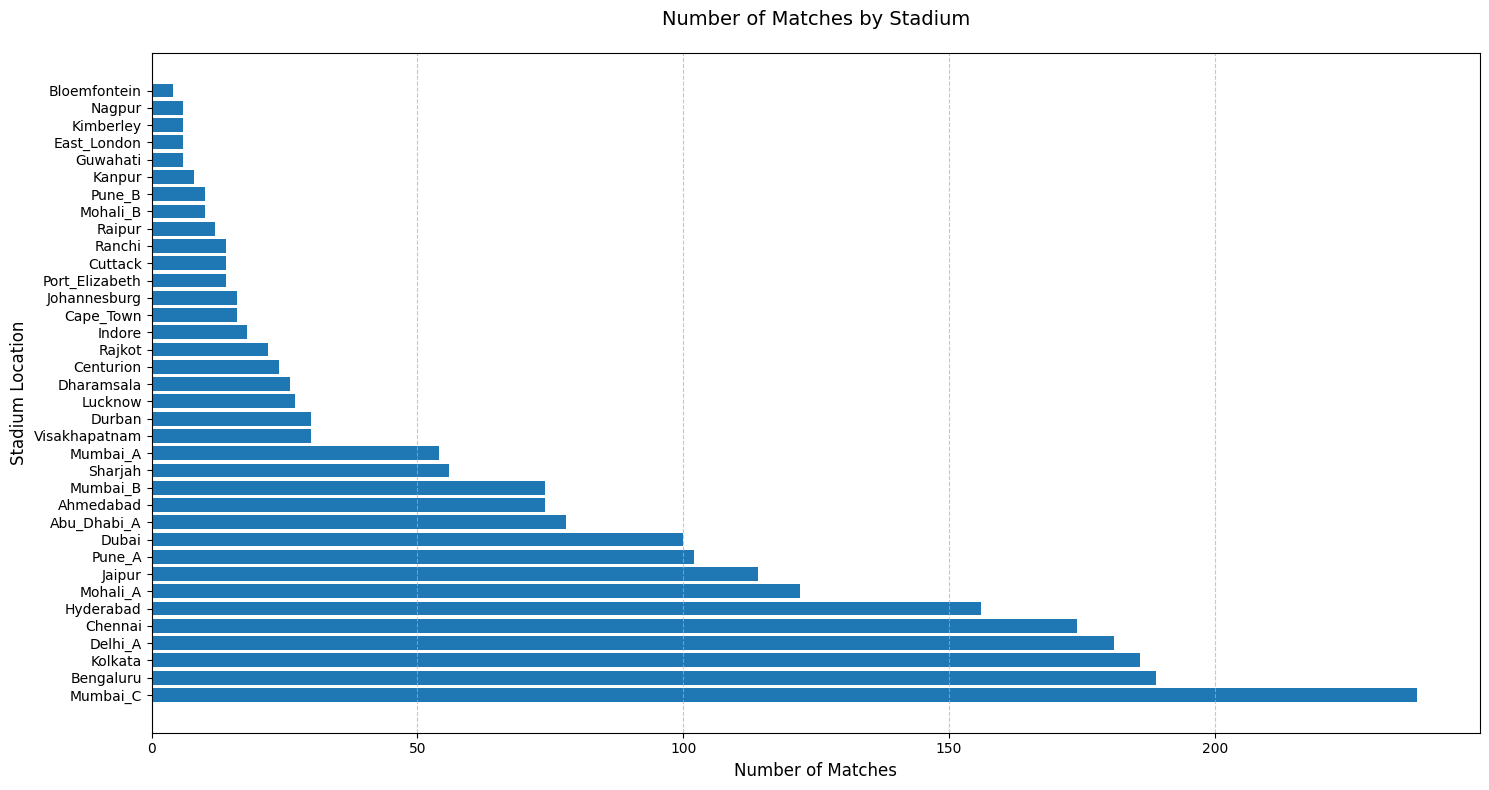


Match counts by stadium:
Mumbai_C: 238 matches
Bengaluru: 189 matches
Kolkata: 186 matches
Delhi_A: 181 matches
Chennai: 174 matches
Hyderabad: 156 matches
Mohali_A: 122 matches
Jaipur: 114 matches
Pune_A: 102 matches
Dubai: 100 matches
Abu_Dhabi_A: 78 matches
Ahmedabad: 74 matches
Mumbai_B: 74 matches
Sharjah: 56 matches
Mumbai_A: 54 matches
Visakhapatnam: 30 matches
Durban: 30 matches
Lucknow: 27 matches
Dharamsala: 26 matches
Centurion: 24 matches
Rajkot: 22 matches
Indore: 18 matches
Cape_Town: 16 matches
Johannesburg: 16 matches
Port_Elizabeth: 14 matches
Cuttack: 14 matches
Ranchi: 14 matches
Raipur: 12 matches
Mohali_B: 10 matches
Pune_B: 10 matches
Kanpur: 8 matches
Guwahati: 6 matches
East_London: 6 matches
Kimberley: 6 matches
Nagpur: 6 matches
Bloemfontein: 4 matches


In [14]:
#import matplotlib.pyplot as plt
from collections import Counter

def analyze_stadium_counts(dataset):
    # Extract all stadiums from the dataset
    all_stadia = [stadium for inning, year, stadium in dataset]
    
    # Map each stadium to its city code using our mapping
    mapped_stadia = [stadium_to_city[stadium] for stadium in all_stadia]
    
    # Count matches at each mapped location
    stadium_counts = Counter(mapped_stadia)
    
    # Sort by count in descending order
    sorted_counts = dict(sorted(stadium_counts.items(), key=lambda x: x[1], reverse=True))
    
    # Create the plot
    plt.figure(figsize=(15, 8))
    
    # Create horizontal bar plot
    plt.barh(list(sorted_counts.keys()), list(sorted_counts.values()))
    
    # Customize the plot
    plt.title('Number of Matches by Stadium', fontsize=14, pad=20)
    plt.xlabel('Number of Matches', fontsize=12)
    plt.ylabel('Stadium Location', fontsize=12)
    
    # Adjust layout to prevent label cutoff
    plt.tight_layout()
    
    # Add grid lines for better readability
    plt.grid(axis='x', linestyle='--', alpha=0.7)
    
    # Show the plot
    plt.show()
    
    # Print the counts
    print("\nMatch counts by stadium:")
    for stadium, count in sorted_counts.items():
        print(f"{stadium}: {count} matches")
    
    return sorted_counts

# Usage:
stadium_counts = analyze_stadium_counts(dataset)